<a href="https://colab.research.google.com/github/Imshubhham/Imshubham/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df = pd.read_csv('Churn_Modelling.csv')

In [19]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [22]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [23]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [24]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [25]:
df.drop(columns = ['RowNumber','CustomerId','Surname'],inplace=True)

In [26]:
df = pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [27]:
X = df.drop(columns=['Exited'])
y = df['Exited'].values

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_trf = scaler.fit_transform(X_train)
X_test_trf = scaler.transform(X_test)

In [38]:
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()
lm.fit(X_train , y_train)
y_pred = lm.predict(X_test)

In [40]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)

78.9


In [86]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

80.9


In [88]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

86.3


In [89]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(X_train,y_train)
y_pred = sv.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

79.75


In [90]:
from sklearn.naive_bayes import GaussianNB
gn = GaussianNB()
gn.fit(X_train,y_train)
y_pred = gn.predict(X_test)
print(accuracy_score(y_test,y_pred)*100)

78.5


In [42]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [43]:
'''model = Sequential()

model.add(Dense(11,activation='sigmoid',input_dim=11))
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))'''

In [70]:
model = Sequential()

model.add(Dense(32,activation='relu',input_dim=11))
model.add(Dense(20,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [71]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 32)                384       
                                                                 
 dense_10 (Dense)            (None, 20)                660       
                                                                 
 dense_11 (Dense)            (None, 11)                231       
                                                                 
 dense_12 (Dense)            (None, 1)                 12        
                                                                 
Total params: 1,287
Trainable params: 1,287
Non-trainable params: 0
_________________________________________________________________


In [45]:
#model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [72]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

In [46]:
#history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 2s 4ms/step - loss: 0.5486 - accuracy: 0.7944 - val_loss: 0.5037 - val_accuracy: 0.7969
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5044 - accuracy: 0.7958 - val_loss: 0.4999 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5035 - accuracy: 0.7958 - val_loss: 0.4992 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5033 - accuracy: 0.7958 - val_loss: 0.4988 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5028 - accuracy: 0.7958 - val_loss: 0.4984 - val_accuracy: 0.7969
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5024 - accuracy: 0.7958 - val_loss: 0.4979 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7958 - val_loss: 0.4976 - val_accuracy: 0.7969

In [79]:
history = model.fit(X_train,y_train,batch_size=50,epochs=100,verbose=1,validation_split=0.2)

Epoch 1/100
128/128 [==============================] - 1s 5ms/step - loss: 0.5217 - accuracy: 0.7937 - val_loss: 0.5202 - val_accuracy: 0.7906
Epoch 2/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5154 - accuracy: 0.7944 - val_loss: 0.5118 - val_accuracy: 0.7969
Epoch 3/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5113 - accuracy: 0.7959 - val_loss: 0.5091 - val_accuracy: 0.7969
Epoch 4/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5100 - accuracy: 0.7961 - val_loss: 0.5059 - val_accuracy: 0.7969
Epoch 5/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5146 - accuracy: 0.7959 - val_loss: 0.5186 - val_accuracy: 0.7975
Epoch 6/100
128/128 [==============================] - 0s 2ms/step - loss: 0.5132 - accuracy: 0.7959 - val_loss: 0.5078 - val_accuracy: 0.7969
Epoch 7/100
128/128 [==============================] - 0s 3ms/step - loss: 0.5024 - accuracy: 0.7959 - val_loss: 0.5028 - val_accuracy: 0.7969

In [49]:
'''y_pred = model.predict(X_test)
y_pred'''

63/63 [==============================] - 0s 4ms/step


array([[0.23777066],
       [0.23777066],
       [0.22452465],
       ...,
       [0.23777066],
       [0.24277511],
       [0.23777066]], dtype=float32)

In [80]:
y_pred = model.predict(X_test)
y_pred

63/63 [==============================] - 0s 2ms/step


array([[0.20453882],
       [0.20453882],
       [0.20453882],
       ...,
       [0.20453882],
       [0.20453882],
       [0.20453882]], dtype=float32)

In [81]:
y_pred = y_pred.argmax(axis=-1)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [51]:
'''from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)'''

0.7975

In [82]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.7975

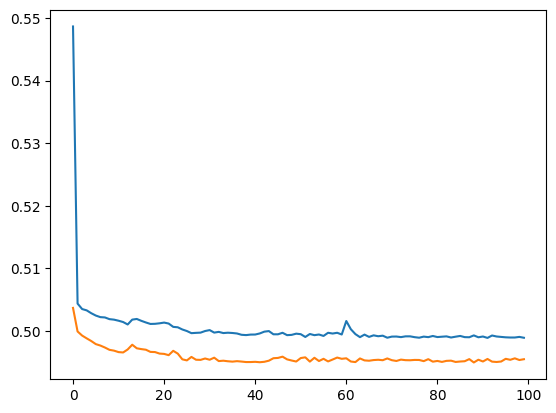

In [55]:
'''plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])'''

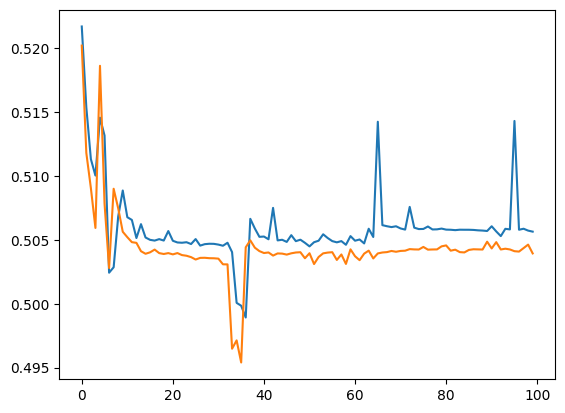

In [83]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

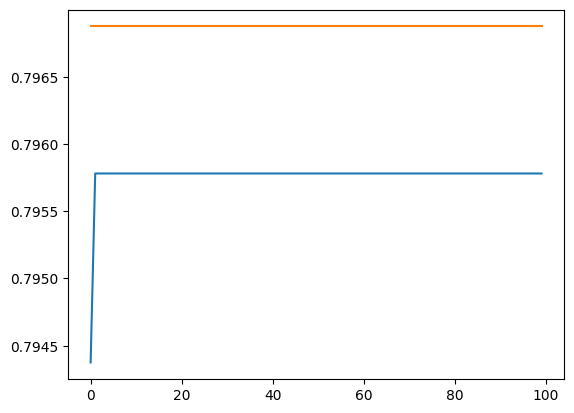

In [54]:
'''plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])'''

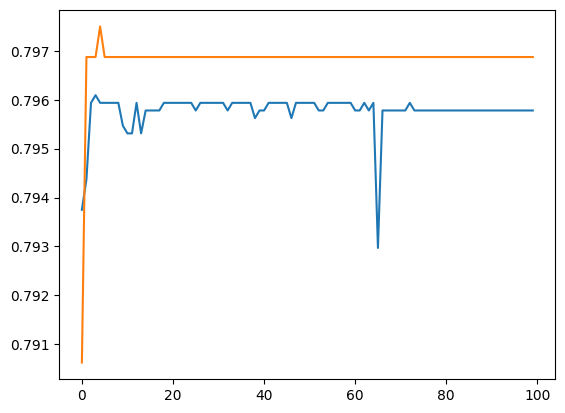

In [84]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In this scenario, the Random Forest algorithm performs well in classifying customers, followed by Decision Trees, and finally Artificial Neural Networks (ANNs).

Random Forest is an ensemble learning method that combines multiple decision trees and makes predictions based on the majority vote of the individual trees. It is known for its ability to handle complex datasets, handle high-dimensional feature spaces, and handle both numerical and categorical data effectively. Random Forest generally provides robust performance and can handle noise and outliers in the data.

Decision Trees, on the other hand, are a fundamental machine learning algorithm that creates a tree-like model of decisions and their potential consequences. Each node in the tree represents a feature or attribute, and each branch represents a possible outcome or decision based on that feature. Decision Trees are relatively interpretable and can handle both classification and regression tasks. However, they may suffer from overfitting if not properly regularized or pruned.

Artificial Neural Networks (ANNs) are a powerful class of machine learning models inspired by the structure and function of the human brain. ANNs consist of interconnected nodes, called neurons, organized into layers. Each neuron applies a non-linear activation function to its inputs, and the network learns to adjust the weights connecting the neurons through a process called training. ANNs can capture complex patterns in the data and have achieved impressive results in various domains. However, they can be computationally intensive, require significant amounts of training data, and may be more challenging to interpret compared to decision trees.

## Based on the given statement, it suggests that Random Forest performs better than Decision Trees, and Decision Trees perform better than ANNs in classifying customers properly. However, it's important to note that the performance of different algorithms can vary depending on the specific dataset, its characteristics, and the problem at hand. It's always recommended to experiment with different algorithms and evaluate their performance using appropriate evaluation metrics before drawing final conclusions.